In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from import_data import get_demand, get_gen, get_mcp, get_vre, read_processed_files
from environment import market_env
from actor_critic import ActorCriticAgent
from utils import plot_learning_curve
import numpy as np

# Get Data

In [4]:
df_demand, df_demand_scaled, df_vre, df_vre_scaled, df_gen, df_gen_scaled, df_mcp = read_processed_files()

In [5]:
# Example usage
env = market_env(demand=df_demand_scaled, re = df_vre_scaled, prices = df_mcp, eps_length=24, capacity=200, mc=35)

# Assuming you have a gym environment called 'env'
input_size = env.observation_space.shape[0]
n_actions = env.action_space.n
n_games = 1000

agent = ActorCriticAgent(input_size, n_actions)

filename = 'power_plant.png'

figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

/Users/louis.skowronek/miniforge3/envs/bda_env/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [6]:
reward_history = []

if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0

    while not done:

        action = agent.choose_action(observation)

        observation_next, reward, done, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

... saving models ...
episode  0 score 0.0 avg_score 0.0
... saving models ...
episode  1 score 46.5 avg_score 23.2
... saving models ...
episode  2 score 69.0 avg_score 38.5
... saving models ...
episode  3 score 66.7 avg_score 45.6
episode  4 score 0.0 avg_score 36.4
episode  5 score -1.4 avg_score 30.1
episode  6 score 43.0 avg_score 32.0
... saving models ...
episode  7 score 180.9 avg_score 50.6
episode  8 score 31.6 avg_score 48.5
episode  9 score 24.1 avg_score 46.0
episode  10 score 85.6 avg_score 49.6
... saving models ...
episode  11 score 65.9 avg_score 51.0
... saving models ...
episode  12 score 86.1 avg_score 53.7
... saving models ...
episode  13 score 132.1 avg_score 59.3
episode  14 score 53.1 avg_score 58.9
episode  15 score 0.0 avg_score 55.2
episode  16 score 6.1 avg_score 52.3
episode  17 score 0.0 avg_score 49.4
episode  18 score 88.3 avg_score 51.5
episode  19 score 1.0 avg_score 48.9
episode  20 score 125.4 avg_score 52.6
... saving models ...
episode  21 score 

In [7]:
env.results_ep.describe()

,reward,market price,bid price,bid volume
count,18480.000000,18480.000000,18480.000000,18480.0
mean,5.977167,98.275269,44.363636,200.0
std,4.571732,106.246421,21.087448,0.0
min,-7.460500,-83.010000,0.000000,200.0
25%,0.000000,35.320000,42.000000,200.0
50%,8.208500,53.940000,42.000000,200.0
75%,9.736025,120.060000,42.000000,200.0
max,12.026900,871.000000,343.000000,200.0


In [10]:
env.results_ep

,reward,market price,bid price,bid volume
2020-06-28 00:00:00+02:00,0.0000,23.93,203.0,200.0
2020-06-28 01:00:00+02:00,0.0000,21.03,217.0,200.0
2020-06-28 02:00:00+02:00,0.0000,16.90,245.0,200.0
2020-06-28 03:00:00+02:00,0.0000,14.26,224.0,200.0
2020-06-28 04:00:00+02:00,0.0000,15.48,119.0,200.0
...,...,...,...,...
2021-07-19 19:00:00+02:00,9.6158,110.00,42.0,200.0
2021-07-19 20:00:00+02:00,9.6828,115.20,42.0,200.0
2021-07-19 21:00:00+02:00,9.6161,110.02,42.0,200.0
2021-07-19 22:00:00+02:00,9.5304,103.86,42.0,200.0


<Axes: >

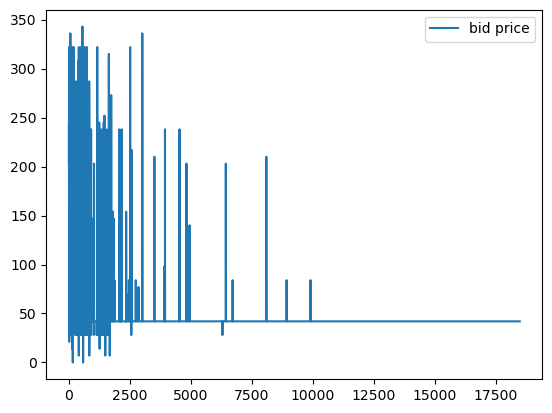

In [25]:
env.results_ep.reset_index().plot(y=['bid price'])

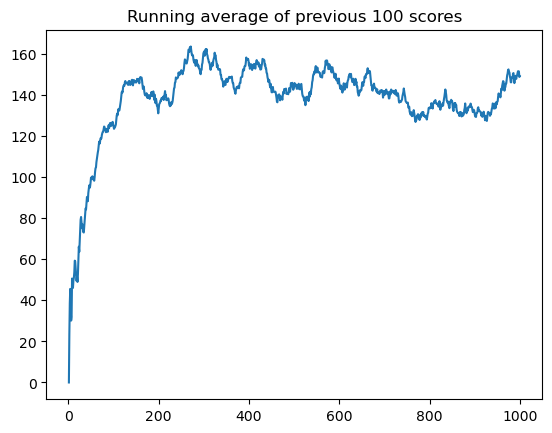

In [26]:
x = [i + 1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)